this script plots yearly publication reduction after removing pulications that are funded by a specific country. The inputs are:
- raw_path: the number of publication in discipline of countries
- filter_path: same with above but without pubs that funded by specific country
- flag_path: file contains country name and iso-3 code

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import funding.core

## Input

In [2]:
raw_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_author_full.csv"
filter_path="../../data/nf_folder/Data/DerivedData/Derived/dep-FundExchange/pub_no_foreign_top20.csv"
flag_path='../../data/nf_folder/Data/AdditionalData/country_WoS_ECI_WB_flags.tsv'

## output

In [3]:
plot_path='../../data/nf_folder/Figs/dep-FundExchange/pub_reduction_bytop10.pdf'

In [4]:
flag_df=pd.read_csv(flag_path,sep='\t')[['WoS','Code']]
raw_df=pd.read_csv(raw_path)
raw_df = raw_df.groupby(['cntry','year'])['count'].sum().reset_index(name='raw')
filter_df=pd.read_csv(filter_path)
filter_df = filter_df.groupby(['srce_cntry','author_distinct','year'])['count'].sum().reset_index(name='filter')
filter_df = filter_df.rename(columns={'author_distinct':'cntry'})
meta=raw_df.merge(filter_df,on=['cntry','year'])
meta['p']=(meta['raw']-meta['filter'])/meta['raw']
meta=meta.merge(flag_df,left_on='srce_cntry',right_on='WoS',how='left')

In [5]:
meta=meta[meta.cntry!=meta.srce_cntry] #remove the influence to itself

## plot

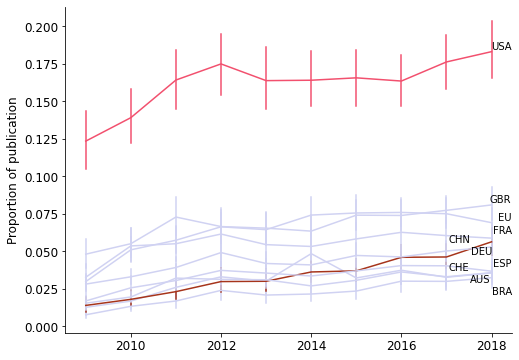

In [8]:

fig, ax=plt.subplots(figsize=(8,6))
topnlist,yvalues=funding.core.select_topn(meta,'Code','p',2018,10)
ax=funding.core.plot(meta,'year','p',ax,topnlist,yvalues,'Proportion of publication')
vals = ax.get_yticks()
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.savefig(plot_path, bbox_inches='tight')

In [9]:
test=meta.groupby(['srce_cntry','cntry']).agg({'raw':'sum','filter':'sum'}).reset_index()

In [11]:
test['p']=(test['raw']-test['filter'])/test['raw']

In [12]:
test

,srce_cntry,cntry,raw,filter,p
0,Australia,Afghanistan,399,391,0.020050
1,Australia,Albania,1424,1418,0.004213
2,Australia,Algeria,25049,25002,0.001876
3,Australia,Andorra,69,69,0.000000
4,Australia,Angola,482,475,0.014523
...,...,...,...,...,...
4096,United States,Venezuela,9655,8605,0.108752
4097,United States,Vietnam,24517,22358,0.088061
4098,United States,Yemen,1914,1824,0.047022
4099,United States,Zambia,2400,1439,0.400417


In [13]:
test.to_csv("network.csv",index=False)